In [289]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

In [290]:
df=pd.read_csv('loans.csv')
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [291]:
# حذف ستون های بی نیاز
df.drop(['client_id', 'loan_id'],inplace=True,axis=1)

In [292]:
df.head()

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,home,13672,0,2002-04-16,2003-12-20,2.15
1,credit,9794,0,2003-10-21,2005-07-17,1.25
2,home,12734,1,2006-02-01,2007-07-05,0.68
3,cash,12518,1,2010-12-08,2013-05-05,1.24
4,credit,14049,1,2010-07-07,2012-05-21,3.13


In [293]:
df.shape

(443, 6)

In [294]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [295]:
df.duplicated().sum()

np.int64(0)

In [296]:
df.nunique()

loan_type        4
loan_amount    438
repaid           2
loan_start     430
loan_end       428
rate           336
dtype: int64

In [297]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [298]:
df.columns

Index(['loan_type', 'loan_amount', 'repaid', 'loan_start', 'loan_end', 'rate'], dtype='object')

<Axes: xlabel='loan_type', ylabel='rate'>

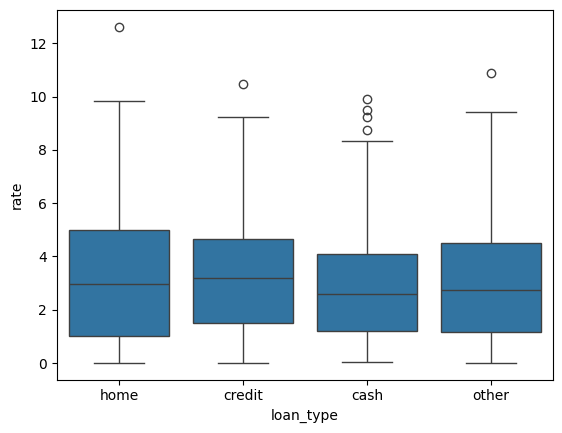

In [299]:
sns.boxplot(x="loan_type",y="rate",data=df)

In [300]:
# حذف داده های پرت 
df = df[(df['rate']>1) &( df['rate']<6)]

<Axes: xlabel='loan_type', ylabel='rate'>

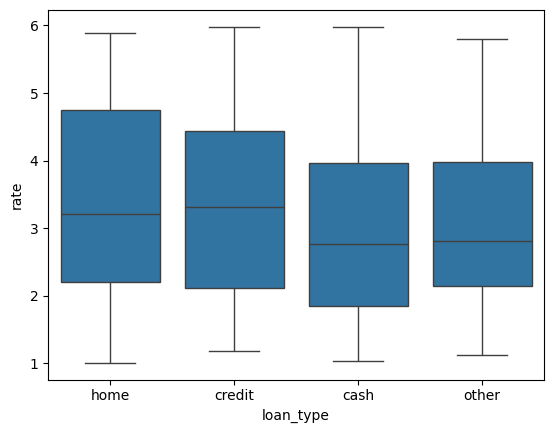

In [301]:
sns.boxplot(x="loan_type",y="rate",data=df)

In [302]:
df.describe()

,loan_amount,repaid,rate
count,290.000000,290.000000,290.000000
mean,8170.413793,0.517241,3.199621
std,4155.849722,0.500566,1.415118
min,559.000000,0.000000,1.010000
25%,4637.500000,0.000000,2.000000
50%,8629.500000,1.000000,2.980000
75%,11852.000000,1.000000,4.237500
max,14946.000000,1.000000,5.980000


In [303]:
df['loan_start'].value_counts().to_frame()

,count
loan_start,
2006-01-19,2
2005-06-22,2
2012-06-17,2
2006-01-20,2
2002-10-22,2
...,...
2005-10-26,1
2001-09-16,1
2013-04-23,1


In [304]:
# چک کردن وجود مقادیر غیر عددی
(df['loan_amount'].fillna('').astype(str).str.isnumeric() == False).sum()


np.int64(0)

In [305]:
df.head()


,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,home,13672,0,2002-04-16,2003-12-20,2.15
1,credit,9794,0,2003-10-21,2005-07-17,1.25
3,cash,12518,1,2010-12-08,2013-05-05,1.24
4,credit,14049,1,2010-07-07,2012-05-21,3.13
5,home,6935,0,2006-09-17,2008-11-26,1.94


In [306]:
# چک کردن اینکه تایپی غیر از دیت تایم هست 
list_check_date = ['loan_start','loan_end']
for check in list_check_date:
    df[check] = pd.to_datetime(df[check], errors='coerce')

In [307]:
# استاندارد سازی
sclaer = StandardScaler()
df[['rate','loan_amount']] =sclaer.fit_transform(df[['rate','loan_amount']])
# LabelEncoder 
label = LabelEncoder()
df['loan_type'] =  label.fit_transform(df['loan_type'])
# MinMaxScaler
min_max=MinMaxScaler()
df['loan_duration_days'] = (pd.to_datetime(df['loan_end']) - pd.to_datetime(df['loan_start'])).dt.days
df['loan_start'] = min_max.fit_transform(pd.to_datetime(df['loan_start']).astype(int).values.reshape(-1, 1))
df['loan_end'] = min_max.fit_transform(pd.to_datetime(df['loan_end']).astype(int).values.reshape(-1, 1))

df.head()



,loan_type,loan_amount,repaid,loan_start,loan_end,rate,loan_duration_days
0,2,1.326106,0,0.143763,0.148247,-0.743001,613
1,1,0.391350,0,0.246877,0.250578,-1.380090,635
3,0,1.047945,1,0.732612,0.757608,-1.387169,879
4,1,1.416978,1,0.703897,0.695497,-0.049283,684
5,2,-0.297785,0,0.444900,0.469123,-0.891655,801


In [308]:
# همبستگی داده ها نسبت به هم
correlation = df.corr()
print(correlation['loan_amount'].sort_values(ascending=False))

loan_amount           1.000000
loan_type             0.012467
repaid                0.005530
rate                 -0.004731
loan_duration_days   -0.017459
loan_start           -0.029178
loan_end             -0.030600
Name: loan_amount, dtype: float64


In [309]:
df.dtypes

loan_type               int64
loan_amount           float64
repaid                  int64
loan_start            float64
loan_end              float64
rate                  float64
loan_duration_days      int64
dtype: object

In [310]:


# داده‌ها و تعریف متغیرهای مختلف X
X_variables = {
    'SingleVariable': df[['loan_type']],
    'TwoVariable': df[['loan_type', 'rate']],
    'MultiVariable': df[['loan_type', 'rate', 'repaid','loan_start','loan_end','loan_duration_days']]
}
# target
y = df[['loan_amount']]

# اسکیل کردن y
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

# تعریف مدل و پارامترها
model = ElasticNet(max_iter=10000)
params = {
    'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

# اجرای حلقه برای هر نوع X
for name, X in X_variables.items():

    # اسکیل کردن X
    X_scaled = preprocessing.scale(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # ایجاد ویژگی‌های چندجمله‌ای
    poly = PolynomialFeatures(degree=2)
    X_scaled_poly = poly.fit_transform(X_scaled)

    # تقسیم داده‌ها به train و test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_poly, y_scaled, test_size=0.15, random_state=42
    )

    # اجرای Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='r2',
        cv=5
    )

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

   
    print(f'''
<---- Grid Search for {name} ---->

Best Parameters : {grid_search.best_params_}
Best Train R2 Score : {grid_search.best_score_}
Best Test R2 Score : {grid_search.score(X_test, y_test)}
___________________________________________________________________________________________________
''')



<---- Grid Search for SingleVariable ---->

Best Parameters : {'alpha': 0.2, 'l1_ratio': 0.6}
Best Train R2 Score : -0.05330528126867003
Best Test R2 Score : -0.005384579435688597
___________________________________________________________________________________________________


<---- Grid Search for TwoVariable ---->

Best Parameters : {'alpha': 0.3, 'l1_ratio': 0.1}
Best Train R2 Score : -0.04264391043754825
Best Test R2 Score : -0.014521512955573579
___________________________________________________________________________________________________


<---- Grid Search for MultiVariable ---->

Best Parameters : {'alpha': 0.4, 'l1_ratio': 0.7}
Best Train R2 Score : -0.05330528126867003
Best Test R2 Score : -0.005384579435688597
___________________________________________________________________________________________________

